In [18]:
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [19]:
res = requests.get("https://api.openaq.org/v2/locations?country=UG", headers={"X-API-Key": ""})
json_data = res.json()
results = json_data.get('results', [])

In [20]:
# convert json to dataframe
data = pd.DataFrame(results)
data.head()

,id,city,name,entity,country,sources,isMobile,isAnalysis,parameters,sensorType,coordinates,lastUpdated,firstUpdated,measurements,bounds,manufacturers
0,526189,None,RHSP,None,UG,None,False,None,"[{'id': 135, 'unit': 'particles/cm³', 'count':...",None,"{'latitude': -0.53842, 'longitude': 31.62202}",2023-11-28T17:19:04+00:00,2020-07-07T00:16:13+00:00,1086031,"[31.62202, -0.53842, 31.62202, -0.53842]","[{'modelName': 'PurpleAir Sensor', 'manufactur..."
1,370295,None,KG Farm,None,UG,None,False,None,"[{'id': 130, 'unit': 'particles/cm³', 'count':...",None,"{'latitude': 0.29693, 'longitude': 32.44406}",2023-11-28T17:18:51+00:00,2022-07-18T16:26:03+00:00,766218,"[32.44406, 0.29693, 32.44406, 0.29693]","[{'modelName': 'PurpleAir Sensor', 'manufactur..."
2,747107,None,Lyantonde RHSP,None,UG,None,False,None,"[{'id': 2, 'unit': 'µg/m³', 'count': 94614, 'a...",None,"{'latitude': -0.407055, 'longitude': 31.15865}",2023-11-28T17:18:40+00:00,2023-03-22T16:00:01+00:00,988584,"[31.15865, -0.407055, 31.15865, -0.407055]","[{'modelName': 'PurpleAir Sensor', 'manufactur..."
3,551971,None,IPA Busia,None,UG,None,False,None,"[{'id': 133, 'unit': 'particles/cm³', 'count':...",None,"{'latitude': 0.455464, 'longitude': 34.12366}",2023-11-28T17:18:35+00:00,2023-02-01T07:13:34+00:00,1076844,"[34.12366, 0.455464, 34.12366, 0.455464]","[{'modelName': 'PurpleAir Sensor', 'manufactur..."
4,367229,None,Kasensero HC2,None,UG,None,False,None,"[{'id': 129, 'unit': 'particles/cm³', 'count':...",None,"{'latitude': -0.91343, 'longitude': 31.763}",2023-11-28T17:18:03+00:00,2022-10-20T12:24:52+00:00,1275354,"[31.763, -0.91343, 31.763, -0.91343]","[{'modelName': 'PurpleAir Sensor', 'manufactur..."


In [ ]:
# data[['name']]

In [ ]:
# general info
data.info()

In [ ]:
# number of rows, number of columns
data.shape

In [ ]:
data.dtypes

In [ ]:
# Number of features/variables
num_variables = len(data.columns)
print(f"Number of features/variables: {num_variables}")

Type of Each Feature:

| **Categorical Features** | **Numerical Features**      | **Temporal Features**       |
|--------------------------|-----------------------------|-----------------------------|
| city                     | id                          | lastUpdated                 |
| name                     | isMobile                    | firstUpdated                |
| entity                   | isAnalysis                  |                             |
| country                  | parameters                  |                             |
| sources                  | coordinates                 |                             |
| sensorType               | lastUpdated                 |                             |
| manufacturers            | firstUpdated                |      

In [ ]:
# Check for missing values in the dataset
data.isnull()

In [ ]:
# Count the number of missing values for each feature
data.isnull().sum()


In [ ]:
# Select only the relevant columns
selected_columns = ['id', 'name', 'country', 'isMobile', 'parameters', 'coordinates', 'lastUpdated',
                     'firstUpdated', 'measurements', 'bounds', 'manufacturers']

# Subset the DataFrame with relevant columns
selected_df = data[selected_columns]

selected_df.head()

In [ ]:
selected_df.describe()

In [ ]:
# Compare air quality measurements over time to identify trends and patterns. 
# Are there specific months, seasons, or days of the week when air quality is consistently better or worse?

# Convert 'lastUpdated' to datetime format
data['lastUpdated'] = pd.to_datetime(data['lastUpdated'])

# debugger
# data['lastUpdated'].head()

# Set 'lastUpdated' as the index
data.set_index('lastUpdated', inplace=True)

# Resample data to daily or weekly averages for smoother trends
resampled_data = data['measurements'].resample('D').mean()  # 'D' for daily, 'W' for weekly

# Plotting the temporal trends
plt.figure(figsize=(12, 6))
plt.plot(resampled_data.index, resampled_data, marker='o', linestyle='-', color='b')
plt.title('Temporal Trends in Air Quality')
plt.xlabel('Date')
plt.ylabel('Average Air Quality Measurement')
plt.grid(True)
plt.show()

The scatter plot shows the average air quality measurement for each month from July 2021 to Nov 2023. The air quality measurement is on a scale of 0 to 1, with 0 being the best air quality and 1 being the worst.

The overall trend in air quality is positive, with the average air quality measurement decreasing over time. This suggests that air quality is improving overall. However, there are some fluctuations in air quality from month to month.

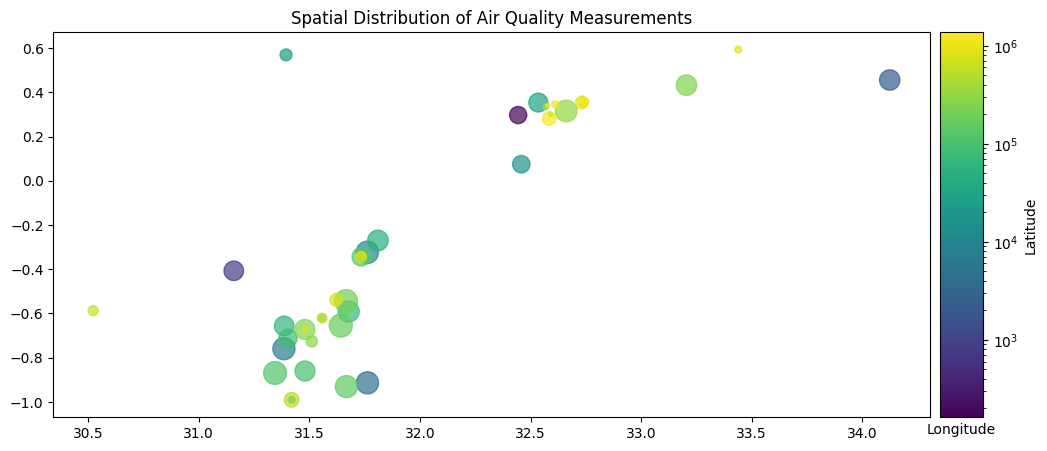

In [22]:
# univariate visualization: 
# geographical distribution of air quality measurements using the latitude and longitude information.

# Convert 'coordinates' column to Point geometry
data['geometry'] = data['coordinates'].apply(lambda coord: Point(coord['longitude'], coord['latitude']))

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(data, geometry='geometry')

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Complex Univariate Visualization: Spatial Distribution of Air Quality Measurements
# Color-coding based on air quality measurements
scatter = gdf.plot(
    ax=ax,
    markersize=data['measurements'] / 5000,
    c=data['measurements'],
    cmap='viridis',
    legend=True,
    norm=LogNorm(),
    alpha=0.7
)

# Add colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# Capture the mappable for the colorbar
sm = plt.cm.ScalarMappable(cmap='viridis', norm=LogNorm())
sm.set_array(data['measurements'])
cbar = plt.colorbar(sm, cax=cax)
cbar.set_label('Air Quality Measurements')

# Center the title
title = ax.set_title('Spatial Distribution of Air Quality Measurements')
title.set_position([.5, 1.05])  # Adjust the y-coordinate to center the title

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()



The air quality measurements from the scatter plot show the highest concentrations of air pollution in the southwest corner of the image, where the latitude and longitude values are lowest. The air pollution then decreases in concentration towards the northeast corner of the image, where the latitude and longitude values are highest. This suggests that there may be a source of air pollution in the southwest corner of the image, such as a factory or power plant.

The colors in the scatter plot represent different levels of air pollution, with the darkest colors representing the highest levels of pollution. 